In [2]:
import cv2
import numpy as np
import pathlib

ROOT_DIR = pathlib.Path(".").absolute()
ROOT_DIR

PosixPath('/Users/jiangnan/Study/FUN/projects_ongoing/FanVision_3D_IDS_Hackathon')

In [7]:
# Abstand von Kamera zu Objekt (Referenzbild) in cm
KNOWN_DISTANCE = 76.2
# Breite des Gesichts im echten Leben in cm
KNOWN_WIDTH = 14.3

# Farben
GREEN = (0, 255, 0)
RED = (0, 0, 255)
BLACK = (0, 0, 0)

# Schriftart
fonts = cv2.FONT_HERSHEY_COMPLEX

# Gesichtserkennung
face_detector = cv2.CascadeClassifier(ROOT_DIR / "haarcascade_frontalface_default.xml")

def Focal_Length_Finder(measured_distance, real_width, width_in_rf_image):
    return (width_in_rf_image * measured_distance) / real_width

def Distance_finder(Focal_Length, real_face_width, face_width_in_frame):
    return (real_face_width * Focal_Length) / face_width_in_frame

def face_data(image):
    face_width = 0
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray_image, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), GREEN, 2)
        face_width = w
    return face_width

# Referenzbild laden
ref_image = cv2.imread(ROOT_DIR / "test_pic.png")
ref_image_face_width = face_data(ref_image)

# Brennweite berechnen
Focal_length_found = Focal_Length_Finder(KNOWN_DISTANCE, KNOWN_WIDTH, ref_image_face_width)
print(f"Focal Length: {Focal_length_found}")

Focal Length: 618.1258741258741


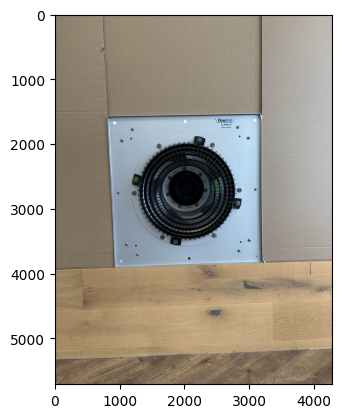

In [9]:
from matplotlib import pyplot as plt

plt.imshow(cv2.cvtColor(ref_image, cv2.COLOR_BGR2RGB))

In [ ]:
# Bild für die Distanzmessung laden
input_image = cv2.imread("input_image.png")
if input_image is None:
    print("Fehler: Bild 'input_image.png' konnte nicht geladen werden.")
    exit(1)

face_width_in_frame = face_data(input_image)
if face_width_in_frame != 0:
    Distance = Distance_finder(Focal_length_found, KNOWN_WIDTH, face_width_in_frame)
    cv2.line(input_image, (30, 30), (230, 30), RED, 32)
    cv2.line(input_image, (30, 30), (230, 30), BLACK, 28)
    cv2.putText(input_image, f"Distance: {round(Distance,2)} CM", (30, 35), fonts, 0.6, GREEN, 2)
else:
    print("Kein Gesicht erkannt.")

cv2.imshow("Distance Estimation", input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Kamera starten
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    face_width_in_frame = face_data(frame)
    if face_width_in_frame != 0:
        Distance = Distance_finder(Focal_length_found, KNOWN_WIDTH, face_width_in_frame)
        cv2.line(frame, (30, 30), (230, 30), RED, 32)
        cv2.line(frame, (30, 30), (230, 30), BLACK, 28)
        cv2.putText(frame, f"Distance: {round(Distance,2)} CM", (30, 35), fonts, 0.6, GREEN, 2)
    cv2.imshow("frame", frame)
    if cv2.waitKey(1) == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()